In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [4]:
adl_inc = pd.read_csv(r"C:\Users\Om\OneDrive\Documents\Labs\MLEL\AdultIncome.csv")

In [5]:
adl_inc

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [6]:
adl_inc.shape[0]

32561

In [7]:
adl_inc.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'country', 'salary'],
      dtype='object')

In [8]:
adl_inc.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
country           object
salary            object
dtype: object

In [9]:
summary_stats = adl_inc.describe()
range_values = summary_stats.loc['max'] - summary_stats.loc['min']
summary_stats.loc['range'] = range_values
print(summary_stats)

                age        fnlwgt  education-num  capital-gain  capital-loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   
range     73.000000  1.472420e+06      15.000000  99999.000000   4356.000000   

       hours-per-week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max    

In [10]:
int_columns = adl_inc.loc[:, adl_inc.dtypes == 'int64']
int_columns = adl_inc[['education'] + list(int_columns.columns)]
int_columns.groupby('education').mean()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
education,,,,,,
10th,37.429796,196832.465166,6.0,404.574491,56.845659,37.052519
11th,32.355745,194928.077447,7.0,215.097872,50.079149,33.925957
12th,32.000000,199097.508083,8.0,284.087760,32.337182,35.780600
1st-4th,46.142857,239303.000000,2.0,125.875000,48.327381,38.255952
5th-6th,42.885886,232448.333333,3.0,176.021021,68.252252,38.897898
7th-8th,48.445820,188079.171827,4.0,233.939628,65.668731,39.366873
9th,41.060311,202485.066148,5.0,342.089494,28.998054,38.044747
Assoc-acdm,37.381443,193424.093721,12.0,640.399250,93.418932,40.504217
Assoc-voc,38.553546,181936.016643,11.0,715.051375,72.754703,41.610709


In [11]:
int_columns.groupby('education').median()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
education,,,,,,
10th,34.0,179813.0,6.0,0.0,0.0,40.0
11th,28.0,184596.0,7.0,0.0,0.0,40.0
12th,28.0,180039.0,8.0,0.0,0.0,40.0
1st-4th,46.0,216187.5,2.0,0.0,0.0,40.0
5th-6th,42.0,217838.0,3.0,0.0,0.0,40.0
7th-8th,50.0,182604.5,4.0,0.0,0.0,40.0
9th,39.0,182709.5,5.0,0.0,0.0,40.0
Assoc-acdm,36.0,182570.0,12.0,0.0,0.0,40.0
Assoc-voc,37.0,174586.5,11.0,0.0,0.0,40.0


In [12]:
int_columns.groupby('education').agg(['mean', 'median'])

age                fnlwgt           education-num         \
                    mean median           mean    median          mean median   
education                                                                       
 10th          37.429796   34.0  196832.465166  179813.0           6.0    6.0   
 11th          32.355745   28.0  194928.077447  184596.0           7.0    7.0   
 12th          32.000000   28.0  199097.508083  180039.0           8.0    8.0   
 1st-4th       46.142857   46.0  239303.000000  216187.5           2.0    2.0   
 5th-6th       42.885886   42.0  232448.333333  217838.0           3.0    3.0   
 7th-8th       48.445820   50.0  188079.171827  182604.5           4.0    4.0   
 9th           41.060311   39.0  202485.066148  182709.5           5.0    5.0   
 Assoc-acdm    37.381443   36.0  193424.093721  182570.0          12.0   12.0   
 Assoc-voc     38.553546   37.0  181936.016643  174586.5          11.0   11.0   
 Bachelors     38.904949   37.0  188055.914846  177305.0          13.0   13.0   
 Doctorate     47.702179   47.0  186698.760291  174215.0          16.0   16.0   
 HS-grad       38.974479   37.0  189538.739739  177727.0           9.0    9.0   
 Masters       44.049913   43.0  179852.362739  171871.0          14.0   14.0   
 Preschool     42.764706   41.0  235889.372549  225065.0           1.0    1.0   
 Prof-school   44.746528   43.0  185663.706597  177273.5          15.0   15.0   
 Some-college  35.756275   34.0  188742.922370  178449.0          10.0   10.0   

               capital-gain        capital-loss        hours-per-week         
                       mean median         mean median           mean median  
education                                                                     
 10th            404.574491    0.0    56.845659    0.0      37.052519   40.0  
 11th            215.097872    0.0    50.079149    0.0      33.925957   40.0  
 12th            284.087760    0.0    32.337182    0.0      35.780600   40.0  
 1st-4th         125.875000    0.0    48.327381    0.0      38.255952   40.0  
 5th-6th         176.021021    0.0    68.252252    0.0      38.897898   40.0  
 7th-8th         233.939628    0.0    65.668731    0.0      39.366873   40.0  
 9th             342.089494    0.0    28.998054    0.0      38.044747   40.0  
 Assoc-acdm      640.399250    0.0    93.418932    0.0      40.504217   40.0  
 Assoc-voc       715.051375    0.0    72.754703    0.0      41.610709   40.0  
 Bachelors      1756.299533    0.0   118.350327    0.0      42.614006   40.0  
 Doctorate      4770.145278    0.0   262.845036    0.0      46.973366   45.0  
 HS-grad         576.800114    0.0    70.466622    0.0      40.575374   40.0  
 Masters        2562.563552    0.0   166.719675    0.0      43.836332   40.0  
 Preschool       898.392157    0.0    66.490196    0.0      36.647059   40.0  
 Prof-school   10414.416667    0.0   231.203125    0.0      47.425347   48.0  
 Some-college    598.824167    0.0    71.637087    0.0      38.852284   40.0

In [13]:
import matplotlib.pyplot as plt

In [14]:
%matplotlib inline

Text(0.5, 1.0, 'Working hours')

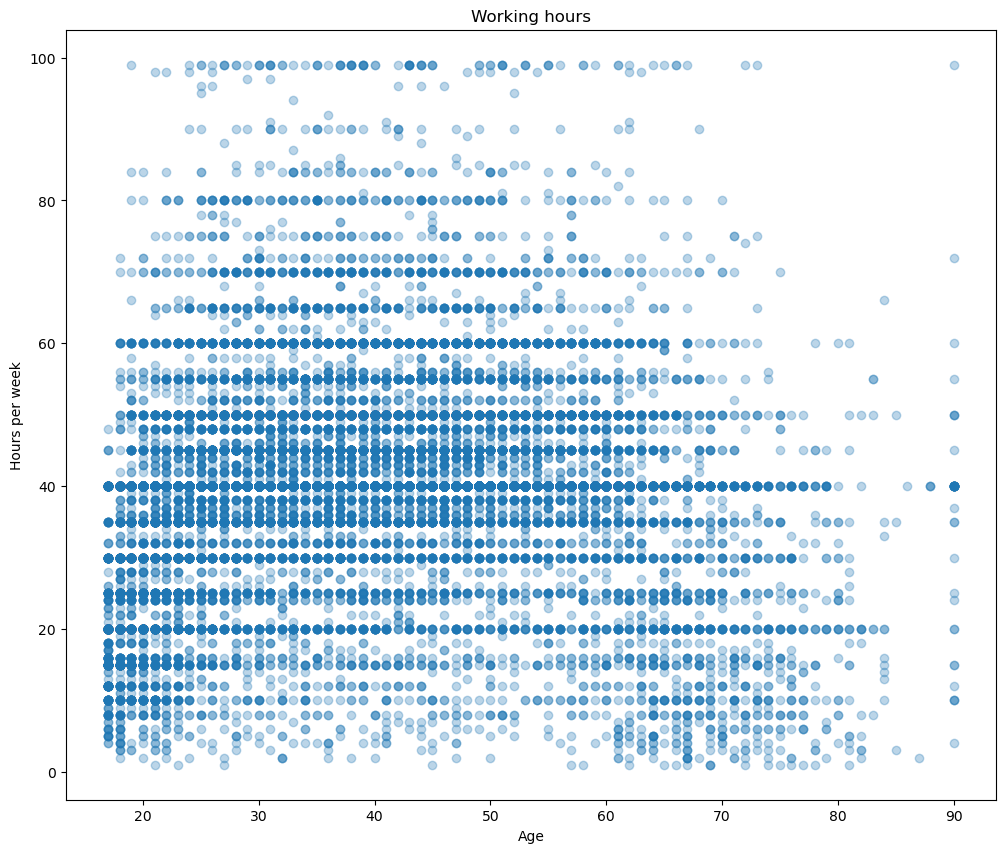

In [30]:
plt.figure(figsize = (12,10))
plt.scatter(adl_inc['age'], adl_inc['hours-per-week'],alpha=0.3)
plt.xlabel('Age')
plt.ylabel('Hours per week')
plt.title('Working hours')

Text(0, 0.5, 'frequency')

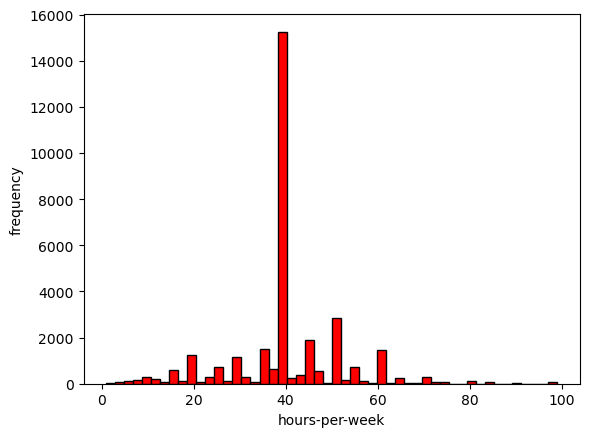

In [37]:
plt.hist(adl_inc['hours-per-week'], bins = 50, color = 'r', edgecolor = 'black')
plt.xlabel('hours-per-week')
plt.ylabel('frequency')

Text(0.5, 1.0, 'Distribution of All Scores')

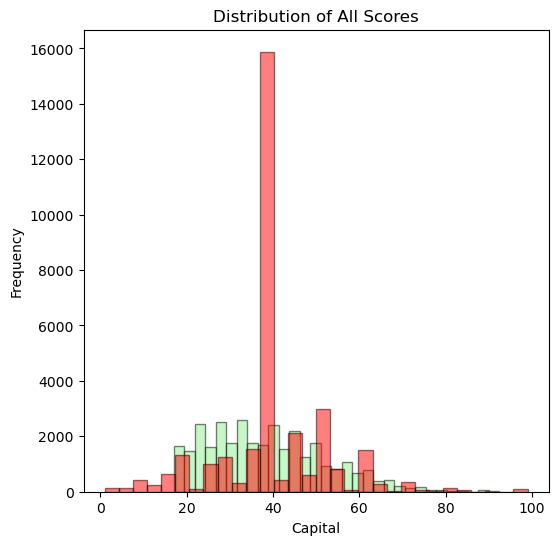

In [44]:
plt.figure(figsize=(6,6))
Values = ['age','hours-per-week']
colors = ['lightgreen','red']
for Value, color in zip(Scores, colors):
    plt.hist(adl_inc[Value], alpha = 0.5, bins = 30, color = color, edgecolor = 'black')
plt.xlabel('Capital')
plt.ylabel('Frequency')
plt.title('Distribution of All Scores')

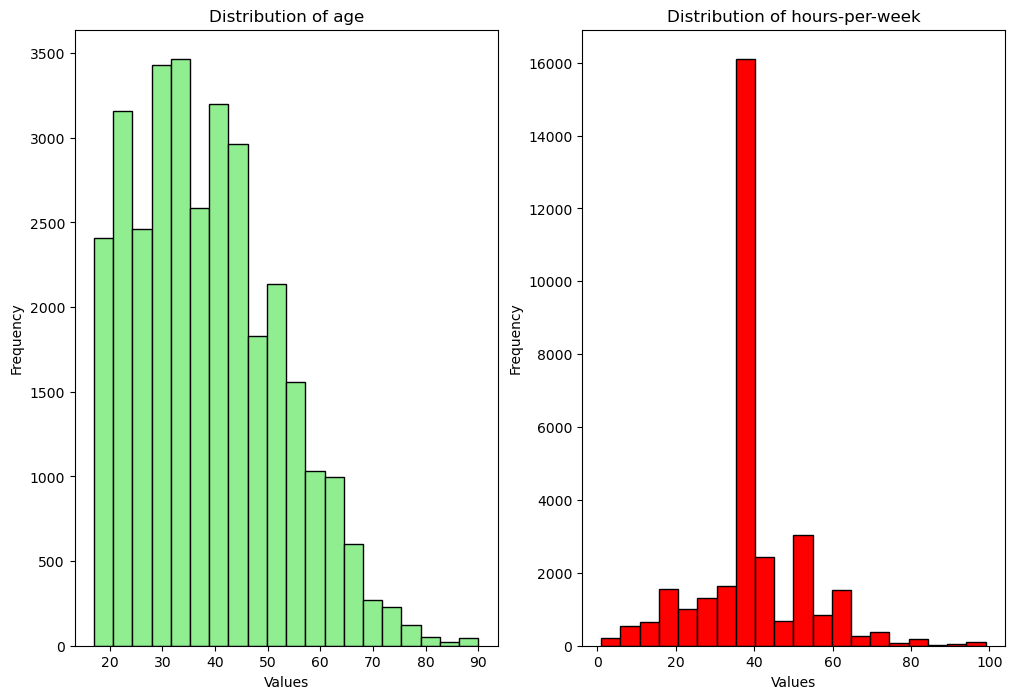

In [49]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))
axes = axes.flatten()
for i, (Value, color) in enumerate(zip(Values, colors)):
    axes[i].hist(adl_inc[Value], bins=20, color=color, edgecolor='black')
    axes[i].set_title(f'Distribution of {Value}')
    axes[i].set_xlabel('Values')
    axes[i].set_ylabel('Frequency')

Text(0, 0.5, 'Values')

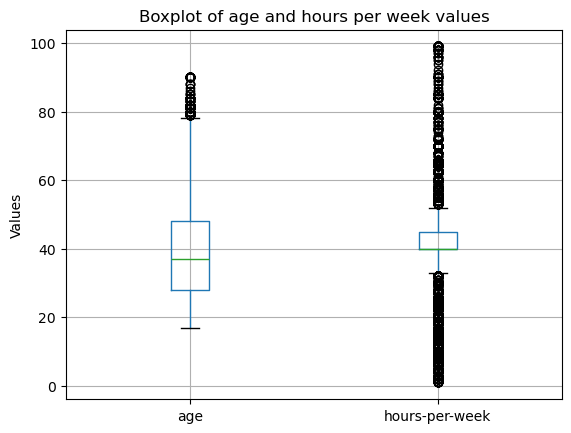

In [54]:
boxplot = adl_inc.boxplot(column = Values)
boxplot.set_title('Boxplot of age and hours per week values')
boxplot.set_ylabel('Values')